In [18]:
import torch
from torch import nn
from d2l import torch as d2l

In [19]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [20]:
def init_params():
    W = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [W, b]

In [21]:
def l2_penalty(W):
    return torch.sum(W.pow(2)) / 2

In [22]:
# 原始实现
def train(lambd):
    W, b = init_params()
    net, loss = lambda X: d2l.linreg(X, W, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test']
                            )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(W)
            l.sum().backward()
            d2l.sgd([W, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('W的L2范数是：', torch.norm(W).item())  # torch.norm 求范数，默认L2范数 .item() 获得元素值

W的L2范数是： 13.02561092376709


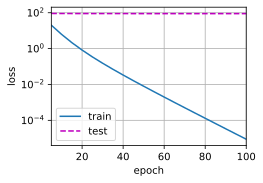

In [23]:
train(lambd=0)

W的L2范数是： 0.37808990478515625


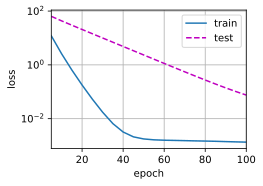

In [26]:
train(lambd=3)

In [36]:
# 简单实现
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    updater = torch.optim.SGD([
        {'params': net[0].weight, 'weight_decay': wd},
        {'params': net[0].bias}], lr=lr)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test']
                            )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            updater.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            updater.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss), d2l.evaluate_loss(net, test_iter, loss)))
    print('W的L2范数是：', net[0].weight.norm().item())  # torch.norm 求范数，默认L2范数 .item() 获得元素值

W的L2范数是： 12.740772247314453


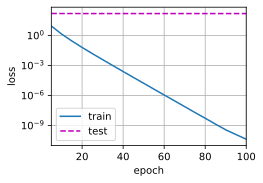

In [37]:
train_concise(0)

W的L2范数是： 0.3871861398220062


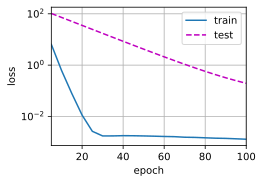

In [38]:
train_concise(3)